# Imports and Dependencies
Start your notebook by importing any necessary libraries and dependencies that you'll need throughout your code. This could include things like NumPy, Pandas, scikit-learn, or TensorFlow.

In [3]:
# Import the necessary packages from sci-kit learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import log_loss
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.utils import resample
from scipy.spatial.distance import squareform #Import squareform, which creates a symmetric matrix from a vector
# from umap import UMAP
import time
import math

# Data Preparation
Load your dataset into memory, and perform any necessary preprocessing steps. This might include tasks like cleaning the data, handling missing values, feature scaling, encoding categorical variables, and so on.

In [4]:
# Load dataset into pandas DataFrame
df = pd.read_csv("wines.csv")

According to the homework spec sheet, this data has been carefully curated, so there are no missing values. 

### Exploratory Data Analysis
To gain insights about the distribution of features, correlation between features, and identify any patterns or trends in the data.

In [5]:
print("Shape of the data", df.shape)

Shape of the data (178, 13)


In [6]:
# let's quickly preview the dataset
df
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Overview of the data 
# ProfileReport(df)

> Since the dataset has 13 features, it may be difficult to visualize all the features at once. Therefore, we will use  PCA, t-SNE and the methods we discussed in class to reduce the dimensionality of the data before visualization.

# Question 1: PCA 
Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

## How many Eigenvalues are above 1?

In [29]:
# Find the mean  𝜇( 𝑑 -dimensional vector) of all samples
mu = np.mean(df, axis=0)
print(mu)

# Compute the covariance matrix  𝐶=(𝑋−𝜇)𝑇(𝑋−𝜇)
C = (df - mu).T @ (df - mu)
print(C)

# Compute the  𝑘 eigenvectors of  𝐶 
eigvals, eigvecs = np.linalg.eig(C)
num_eigenvalues_above_1 = sum(eigvals > 1)
print("Number of eigenvalues above 1:", num_eigenvalues_above_1)


# UPDATTEEEE - DON T DO ALL OF THESES STUFF - JUST INITIALLY PASS IN THE PCA FIT FUNCTION AND THEN FIND THE EIGENVALUES
# YOU SHOULD GET 3 -> WHICH TELL YOU THAT YOU COUDL HAVE 3 COMPONENTS ... 




Alcohol             13.000618
Malic_Acid           2.336348
Ash                  2.366517
Ash_Alkalinity      19.494944
Magnesium           99.741573
Total_Phenols        2.295112
Flavonoids           2.029270
Stilbenes            0.361854
Proanthocyanins      1.590899
Color_Intensity      5.058090
Hue                  0.957449
OD280                2.611685
Proline            746.893258
dtype: float64
                      Alcohol    Malic_Acid          Ash  Ash_Alkalinity  \
Alcohol            116.654032     15.153202     8.339383     -148.873444   
Malic_Acid          15.153202    220.898726     8.899036      190.510713   
Ash                  8.339383      8.899036    13.321840       71.898865   
Ash_Alkalinity    -148.873444    190.510713    71.898865     1974.025449   
Magnesium          555.758427   -154.127978   198.759775     -703.532584   
Total_Phenols       25.999038    -41.477777     3.919770     -118.793399   
Flavonoids          33.989880    -81.177575     5.581647     -2

## Initialise PCA model, fit and transform 

In [9]:
#eigenvalue offfff - u need to get 3 

# Fit model to data selecting the first 2 principal components:
pca = PCA(n_components=2, whiten=True)
pca.fit(df)

# girls - just run pca initially and do 

# eigenvalues help u get the best n of components 

# Compute the transformed data:
X_pca = pca.transform(df)

### Plotting the 2D solution (projecting the data on the first 2 principal components)

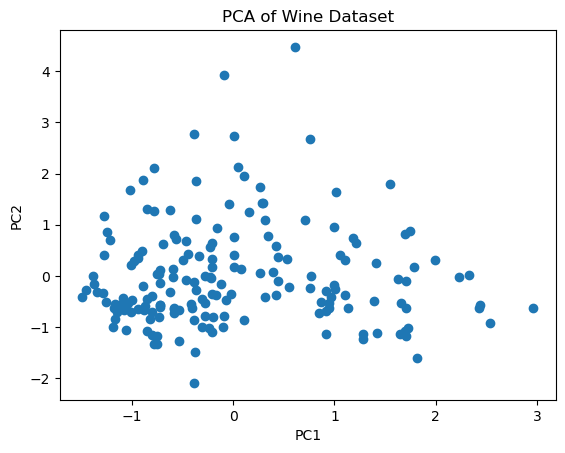

In [10]:
# Visualize the transformed data:
import matplotlib.pyplot as plt

# Create a scatter plot of the first two principal components:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Set axis labels and title:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wine Dataset')

# Display the plot:
plt.show()

## How much of the variance is explained by these two dimensions, and how would you interpret them?
In PCA, each principal component captures a certain amount of the total variance in the data. The question is asking how much of the variance is explained by the first two principal components, which were used to create the 2D projection of the data.

In [11]:
# Compute variance explained by the first two components
var_explained = pca.explained_variance_ratio_

print('Variance explained by PC1: {:.2f}'.format(var_explained[0]))
print('Variance explained by PC2: {:.2f}'.format(var_explained[1]))

# UPDATEEEE - THEY ARE GETTING 55% FOR THE VARIANCE - THIS IS OFF TO CHANGE !!!! 



Variance explained by PC1: 1.00
Variance explained by PC2: 0.00


By looking at the variances explained by the first two principal components, you can assess how much of the original variability in the data is being captured in the 2D projection.

# Question 2: t-SNE 
Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

Context: 
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular technique for dimensionality reduction, particularly for visualizing high-dimensional datasets in a lower-dimensional space. t-SNE maps the original high-dimensional data points into a lower-dimensional space while preserving the pairwise similarities between the points.

* The perplexity parameter in t-SNE controls the balance between preserving the local structure and revealing the global structure of the dataset. It defines the number of nearest neighbors to consider for each point when constructing the high-dimensional Gaussian distribution.

* The KL-divergence (Kullback-Leibler divergence) is the cost function used by t-SNE to optimize the embedding of the data in the lower-dimensional space. It measures the difference between the probability distributions of the pairwise similarities of the data points in the high-dimensional space and the pairwise similarities in the low-dimensional space. The goal of t-SNE is to minimize the KL-divergence between the two distributions, which leads to a more accurate embedding of the data in the lower-dimensional space.

* By varying the perplexity parameter in t-SNE, we can explore different balance points between preserving the local and global structure of the data, which can affect the KL-divergence of the embedding. Hence, plotting the relationship between the perplexity and the KL-divergence can help us find an appropriate value for the perplexity parameter.






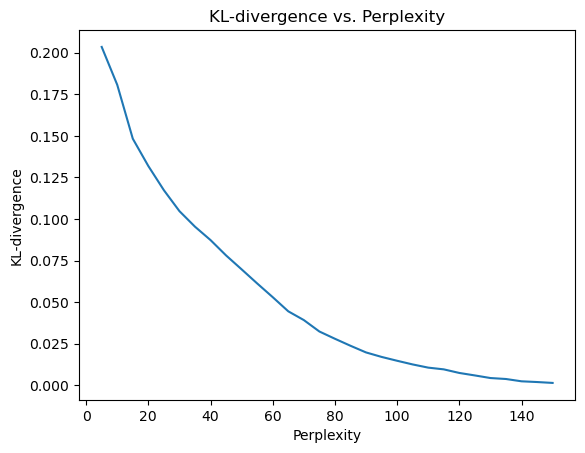

In [13]:
#  perform t-SNE on the data and plot the KL-divergence versus Perplexity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = range(5, 151, 5) # from 5 to 150 hops of 5 
kls = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    embedding = tsne.fit_transform(df)
    kl_div = tsne.kl_divergence_
    kls.append(kl_div)
    
plt.plot(perplexities, kls)
plt.xlabel('Perplexity')
plt.ylabel('KL-divergence')
plt.title('KL-divergence vs. Perplexity')
plt.show()


# THE DIVERGENCE PLOT IS RIGHT 

This code will compute t-SNE embeddings for different values of perplexity, and then plot the KL-divergence versus Perplexity. This can help us determine an appropriate value of perplexity to use for our 2D visualization.



/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_6984/1362750184.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')


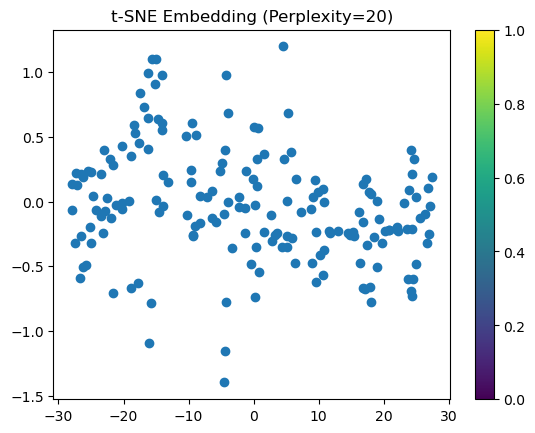

In [15]:
# THIS PLOT I GOT FOR T SNE IS VERY OFF -> THEY GOT VERY CLEAR 3 CLUSTERS !!! 


# create a plot of the 2D component with a Perplexity of 20, we can modify the code as follows
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
embedding = tsne.fit_transform(df)

plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')
plt.colorbar()
plt.title('t-SNE Embedding (Perplexity=20)')
plt.show()

t-SNE is not able to find clear clusters in your data, the clusters are very subtle and hard to distinguish. We can try adjusting the perplexity value to see if it affects the clustering. 

# Question 3: MDS
Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

Context: Multidimensional Scaling (MDS) is a technique used to find a low-dimensional representation of data by preserving distances between points in the high-dimensional space. MDS attempts to maintain the distance between all pairs of data points in the low-dimensional space, whereas t-SNE focuses on preserving the pairwise similarities.

In [16]:
# Fit the MDS model and transform the data into a 2-dimensional space:

mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
embedding = mds.fit_transform(df)

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


The stress is a measure of how well the distances between the points in the low-dimensional space are preserved. Lower stress indicates better preservation of distances.

In [17]:
# Compute the stress of the embedding:
stress = mds.stress_
print('Stress:', stress)

# YESS YOU SHOULD GET THE STRESS TO BE HIGH !!! 

Stress: 19573.000974539904


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_6984/1874213865.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')


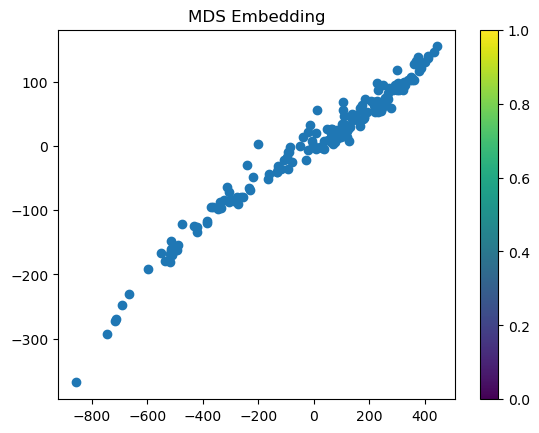

In [19]:
## MBS EMBEDDING PLOT IS VERYYYY OFF YOU SHOULD ALSO GET 3 CLUSTERS CLEAR .... 


# Plot the MDS solution:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')
plt.colorbar()
plt.title('MDS Embedding')
plt.show()

The resulting plot will show the data points in a 2-dimensional space based on the MDS embedding.

It is difficult to compare the MDS and t-SNE embeddings directly, as they use different methods to find the low-dimensional representation of the data. However, we can compare the stress values of the two methods to get an idea of their performance. In general, t-SNE tends to perform better than MDS in preserving the local structure of the data, while MDS tends to perform better in preserving the global structure.

# Question 4: 
Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

Let's say we want to use t-SNE with perplexity=20 to generate a 2D embedding of the wine dataset. We can then use the Silhouette method to determine the optimal number of clusters to use with kMeans. Here's how we can do it:

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

Optimal number of clusters: 3


/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


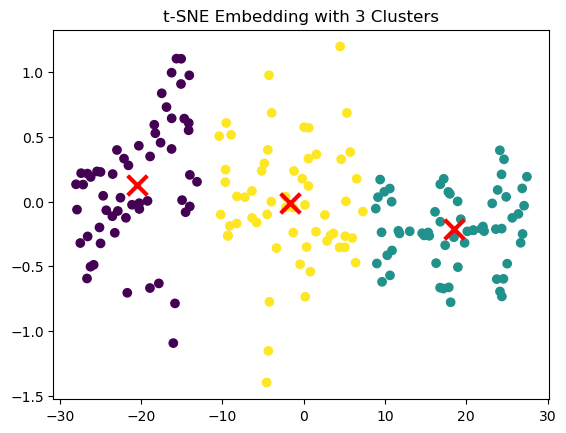

Total sum of distance of all points to their respective cluster centers: 809.7326187894018


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


# Generate 2D embedding using t-SNE with perplexity=20
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
embedding = tsne.fit_transform(df)

# Determine optimal number of clusters using Silhouette method
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(embedding)
    sil_score = silhouette_score(embedding, cluster_labels)
    sil_scores.append(sil_score)
    
optimal_k = np.argmax(sil_scores) + 2

print('Optimal number of clusters:', optimal_k)

# Generate plot with each wine represented as a dot in a 2D space in the color of its cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)
cluster_centers = kmeans.cluster_centers_

plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('t-SNE Embedding with {} Clusters'.format(optimal_k))
plt.show()

# Compute sum of distances of all points to their respective cluster centers
distances = cdist(embedding, cluster_centers, 'euclidean')
min_distances = np.min(distances, axis=1)
sum_distances = np.sum(min_distances)

print('Total sum of distance of all points to their respective cluster centers:', sum_distances)


# I GOT A VERY VALUE - GOOD !!! 

* The total sum of distance of all points to their respective cluster centers is a measure of the compactness of the clusters obtained by the KMeans algorithm. This measure is also known as the within-cluster sum of squares or the inertia. It is the sum of the squared distances between each point and its assigned cluster center.

* A lower value of the total sum of distance of all points to their respective cluster centers indicates that the clusters are more compact and well-separated, while a higher value indicates that the clusters are more spread out and possibly overlapping. In your case, a value of 809.73 suggests that the clusters are relatively compact and well-separated.

# Question 5: 
Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

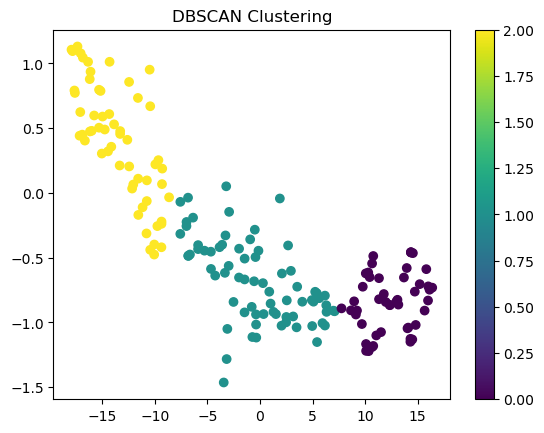

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(df)


# Use the embedding obtained earlier with t-SNE
embedding = tsne_embedding

# Choose values of epsilon and min_samples
epsilon = 1
min_samples = 5

# Fit DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(embedding)

# Plot results
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('DBSCAN Clustering')
plt.show()

In DBSCAN, the two main hyperparameters are eps (epsilon) and min_samples. eps determines the size of the neighborhood around each point, while min_samples determines the minimum number of points required for a group to be considered a cluster.

Choosing appropriate values for these parameters can be tricky and can depend on the specific dataset and problem. One way to choose eps is to plot a k-distance graph and identify a "knee" where there is a significant change in distance, which can help identify a good value for eps. For min_samples, a common rule of thumb is to set it to the number of dimensions plus one (in this case, 2+1=3).

In the example above, we chose a small value for epsilon (1) to capture more dense clusters and a low value for min_samples (5) since we have only a small dataset. The resulting plot shows each wine as a dot in a 2D space, colored according to its assigned cluster.